# t检验

In [1]:
from scipy import stats as st
np.random.seed(12345)

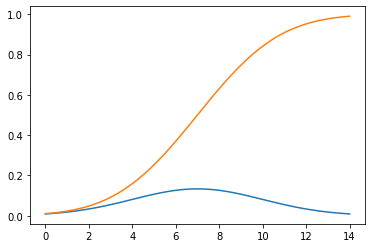

In [2]:
nd = st.norm(7, 3)
x = np.linspace(0, 14, 100)
y = nd.pdf(x)
z = nd.cdf(x)
plt.plot(x, y)
plt.plot(x, z)

In [3]:
data = nd.rvs(100)
data[:3]
np.mean(data)
st.sem(data)

array([6.38587702, 8.43683001, 5.44168385])

7.100843164626591

0.31208976207563466

In [4]:
checkVal = 6.5

In [5]:
t, tProb = st.ttest_1samp(data, checkVal)
t
tProb

1.9252254884316808

0.05707107880872914

In [6]:
mmean = np.mean(data)
mmean
mstd = np.std(data, ddof=1)
mstd
normProb = st.norm.cdf(checkVal, loc=mmean,
        scale=mstd/np.sqrt(len(data)))*2

normProb

7.100843164626591

3.1208976207563466

0.05420115469007144

In [7]:
tavl = (6.5 - 7.1) / st.sem(data,ddof=1)
tavl

-1.9225238149740722

In [8]:
td = st.t(len(data) - 1)
td.cdf(tavl) * 2

0.0574141945131751

In [9]:
nd_ = st.norm()
nd_.cdf(tavl) * 2

0.05453987993447378

In [10]:
st.sem(data,ddof=1)
np.std(data) / (99 ** (1/2))

0.31208976207563466

0.3120897620756347

# wilcoxon符号秩和检验

In [11]:
data = np.loadtxt('./ISP/Code_Quantlets/08_TestsMeanValues/oneGroup/altman_91.txt')
data

array([5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515.,
       8230., 8770.])

In [12]:
td = st.t(len(data) - 1)
t_ = (np.mean(data) - 7725)/ (np.std(data) / ((len(data) - 1)) ** (1 / 2))
t_

-2.82075406083102

In [13]:
td.cdf(t_) * 2

0.018137235176105784

In [14]:
st.wilcoxon(data - 7725)

WilcoxonResult(statistic=8.0, pvalue=0.026157182329284684)

In [15]:
from scipy import stats
myMean = np.mean(data)
mySD = np.std(data, ddof=1)     # sample standard deviation
print(('Mean and SD: {0:4.2f} and {1:4.2f}'.format(myMean, mySD)))

# Confidence intervals
tf = stats.t(len(data)-1)
# multiplication with np.array[-1,1] is a neat trick to implement "+/-"
ci = np.mean(data) + stats.sem(data)*np.array([-1,1])*tf.ppf(0.975)
print(('The confidence intervals are {0:4.2f} to {1:4.2f}.'.format(ci[0], ci[1])))

# Check if there is a significant difference relative to "checkValue"
checkValue = 7725
# --- >>> START stats <<< ---
t, prob = stats.ttest_1samp(data, checkValue)
if prob < 0.05:
    print(('{0:4.2f} is significantly different from the mean (p={1:5.3f}).'.format(checkValue, prob)))

# For not normally distributed data, use the Wilcoxon signed rank sum test
(rank, pVal) = stats.wilcoxon(data-checkValue)
(rank, pVal)
if pVal < 0.05:
  issignificant = 'unlikely'
else:
  issignificant = 'likely'
# --- >>> STOP stats <<< ---

print(('It is ' + issignificant + ' that the value is {0:d}'.format(checkValue)))

Mean and SD: 6753.64 and 1142.12
The confidence intervals are 5986.35 to 7520.93.
7725.00 is significantly different from the mean (p=0.018).


(8.0, 0.026157182329284684)

It is unlikely that the value is 7725


# 配对t检验

In [16]:
np.random.seed(1234)
data = np.random.randn(10) + 0.1
data
data1 = np.random.randn(10) * 5
data1
data2 = data + data1
data2

array([ 0.57143516, -1.09097569,  1.53270697, -0.2126519 , -0.62058873,
        0.98716294,  0.95958841, -0.5365235 ,  0.11569637, -2.14268495])

array([  5.75017862,   4.95973011,   4.76662064, -10.1062741 ,
        -1.67038683,   0.01059182,   2.02726706,   1.4454597 ,
         6.60579096,  -7.73452777])

array([  6.32161379,   3.86875442,   6.29932761, -10.318926  ,
        -2.29097556,   0.99775476,   2.98685547,   0.9089362 ,
         6.72148733,  -9.87721272])

In [17]:
t = st.t(len(data) - 1)
tval = np.mean(data) / (np.std(data, ddof=1) / len(data) ** (1 / 2))
tval
t.cdf(tval) * 2

-0.12458492298731402

0.9035904508547085

In [18]:
t_statistic, p_value = stats.ttest_rel(data2, data1)
t_statistic, p_value

(-0.1245849229873135, 0.9035904508547089)

# 独立组别之间的t检验

+ 独立组别之间满足$t(n_1+n_2-2)$的分布  
+ t值
$$
t=\frac{\overline{X}_{1}-\overline{X}_{2}}{\sqrt{S_{C}^{2}\left(\frac{1}{n_{1}}+\frac{1}{n_{2}}\right)}}=\frac{\overline{X}_{1}-\overline{X}_{2}}{\sqrt{\frac{\left(n_{1}-1\right) S_{1}^{2}+\left(n_{2}-1\right) S_{2}^{2}}{n_{1}+n_{2}-2}\left(\frac{1}{n_{1}}+\frac{1}{n_{2}}\right)}}
$$

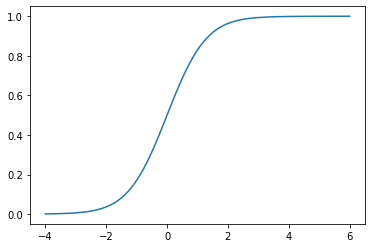

In [19]:
x = np.linspace(-4, 6, 100)
y = td.cdf(x)
plt.plot(x, y)

In [20]:
data = np.loadtxt('./ISP/Code_Quantlets/08_TestsMeanValues/twoGroups/altman_94.txt',delimiter=',')
data[:3]

array([[9.21, 0.  ],
       [7.53, 1.  ],
       [7.48, 1.  ]])

In [21]:
group1 = data[data[:, 1] == 0][:, 0]
group1.shape
group2 = data[data[:, 1] == 1][:, 0]
group2.shape

(9,)

(13,)

In [22]:
g1_mean = np.mean(group1)
g1_var = np.var(group1, ddof=1)
g1_n = len(group1)
g2_mean = np.mean(group2)
g2_var = np.var(group2, ddof=1)
g2_n = len(group2)
g1_n, g1_mean, g1_var
g2_n, g2_mean, g2_var


(9, 10.297777777777776, 1.954044444444444)

(13, 8.066153846153847, 1.5328423076923077)

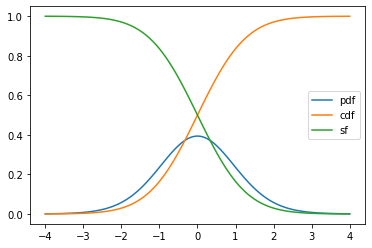

In [23]:
td = st.t(g1_n + g2_n - 2)
x = np.linspace(-4, 4, 100)
y1 = td.pdf(x) #概率密度函数 
y2 = td.cdf(x) #累计分布函数
y3 = td.sf(x) #生存函数
y4 = td.ppf(x) #百分点函数
y5 = td.isf(x) #逆生存函数
plt.plot(x, y1, label='pdf')
plt.plot(x, y2, label='cdf')
plt.plot(x, y3, label='sf')
plt.legend()

In [24]:
tval = (g1_mean - g2_mean) / (((g1_n - 1) * g1_var + (g2_n - 1) * g2_var) / (g1_n + g2_n - 2) * (1 / g1_n + 1 / g2_n)) ** (1 / 2)
tval
td.sf(tval) * 2

3.9455649161549835

0.0007989982111700593

In [25]:
t_statistic, p_value = st.ttest_ind(group1, group2)
t_statistic, p_value

(3.9455649161549835, 0.0007989982111700593)

# 两组之间的非参数比较

'1.3.0'

('Mann-Whitney test', 0.002121613385880049)


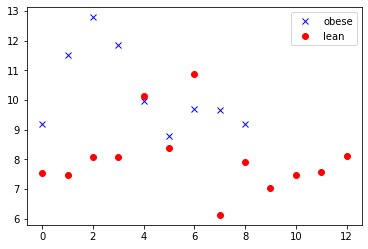

In [26]:
import scipy as sp
sp.__version__
if np.int(sp.__version__.split('.')[1]) > 16:
    u, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
else:
    u, p_value = stats.mannwhitneyu(group1, group2, use_continuity=True)
    p_value *= 2    # because the default was a one-sided p-value

print(("Mann-Whitney test", p_value))
# --- >>> STOP stats <<< ---

# Plot the data
plt.plot(group1, 'bx', label='obese')
# plt.hold(True)
plt.plot(group2, 'ro', label='lean')
plt.legend(loc=0)
plt.show()

# 统计学假设检验与统计学建模

## 经典t检验

In [27]:
np.random.seed(123)
race_1 = np.round(np.random.rand(20) * 10 + 90)
race_2 = np.round(np.random.rand(20) * 10 + 85)
race_1
race_2
tval, p = st.ttest_rel(race_1, race_2) #配对样本t检验
tval, p

array([ 97.,  93.,  92.,  96.,  97.,  94., 100.,  97.,  95.,  94.,  93.,
        97.,  94.,  91.,  94.,  97.,  92.,  92.,  95.,  95.])

array([91., 93., 92., 91., 92., 88., 89., 87., 88., 91., 86., 89., 89.,
       90., 89., 88., 89., 94., 94., 90.])

(6.056330934239536, 7.96883264940563e-06)

## 统计学建模

In [29]:
import statsmodels.formula.api as sm
df = DataFrame({'race1': race_1, 'race2': race_2})
df

,race1,race2
0,97.0,91.0
1,93.0,93.0
2,92.0,92.0
3,96.0,91.0
4,97.0,92.0
5,94.0,88.0
6,100.0,89.0
7,97.0,87.0
8,95.0,88.0
9,94.0,91.0


In [30]:
result = sm.ols(formula='I(race2-race1) ~ 1', data=df).fit()
result.summary()

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\regression\linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(race2 - race1)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 20 Aug 2019   Prob (F-statistic):                nan
Time:                        13:29:45   Log-Likelihood:                -52.964
No. Observations:                  20   AIC:                             107.9
Df Residuals:                      19   BIC:                             108.9
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7500      0.784     -6.056      0.000      -6.392      -3.108
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.471
Skew:                           0.139   Prob(JB):                        0.790
Kurtosis:                       2.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 多组比较

## 单因素方差分析（ANOVA）

### 1

In [38]:
# additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [32]:
inFile = './ISP/Code_Quantlets/08_TestsMeanValues/anovaOneway/altman_910.txt'
data = np.genfromtxt(inFile, delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

group1
group2
group3

array([243., 251., 275., 291., 347., 354., 380., 392.])

array([206., 210., 226., 249., 255., 273., 285., 295., 309.])

array([241., 258., 270., 293., 328.])

In [36]:
w, p = st.levene(group1, group2, group3) #方差齐性检验
w, p

(3.641303086027156, 0.045846812634186246)

In [37]:
F_statistic, pVal = st.f_oneway(group1, group2, group3) #方差齐性检验
F_statistic, pVal

(3.7113359882669763, 0.043589334959178244)

In [40]:
# Elegant alternative implementation, with pandas & statsmodels
df = pd.DataFrame(data, columns=['value', 'treatment'])    
df[:3]
model = ols('value ~ C(treatment)', df).fit()
anovaResults = anova_lm(model)
anovaResults

# Check if the two results are equal. If they are, there is no output
np.testing.assert_almost_equal(F_statistic, anovaResults['F'][0])

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0


,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,15515.766414,7757.883207,3.711336,0.043589
Residual,19.0,39716.097222,2090.320906,NaN,NaN


### 2

In [42]:
# Get the data
data = pd.read_csv('./ISP/Code_Quantlets/08_TestsMeanValues/anovaOneway/galton.csv')
data[:5]

# First, calculate the F- and the T-values, ...
F_statistic, pVal = stats.f_oneway(data['father'], data['mother'])
F_statistic, pVal
t_val, pVal_t = stats.ttest_ind(data['father'], data['mother'])
t_val, pVal_t

# ... and show that t**2 = F
print('\nT^2 == F: ------------------------------------------')
print(('From the t-test we get t^2={0:5.3f}, and from the F-test F={1:5.3f}'.format(t_val**2, F_statistic)))

# numeric test
np.testing.assert_almost_equal(t_val**2, F_statistic)

,family,father,mother,sex,height,nkids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


(2083.4808060362743, 1.4431979631307123e-302)

(45.64516191269643, 1.443197963131157e-302)


T^2 == F: ------------------------------------------
From the t-test we get t^2=2083.481, and from the F-test F=2083.481


In [43]:
anova_results = anova_lm(ols('height ~ 1 + sex', data).fit())
print('\nANOVA with "statsmodels" ------------------------------')
anova_results


ANOVA with "statsmodels" ------------------------------


,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,5874.573234,5874.573234,933.184603,5.175573e-141
Residual,896.0,5640.489138,6.295189,NaN,NaN


### 3

In [71]:
inFile = './ISP/Code_Quantlets/08_TestsMeanValues/anovaOneway/altman_910.txt'
data = np.genfromtxt(inFile, delimiter=',')

# Convert them to pandas-forman and group them by their group value
df = pd.DataFrame(data, columns=['values', 'group'])
df[:5]
df.describe().T

,values,group
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0


,count,mean,std,min,25%,50%,75%,max
values,22.0,283.227273,51.284391,206.0,249.5,274.0,305.5,392.0
group,22.0,1.863636,0.774317,1.0,1.0,2.0,2.0,3.0


In [72]:
# The "total sum-square" is the squared deviation from the mean
ss_total = np.sum((df['values']-df['values'].mean())**2)
ss_total

55231.86363636364

In [73]:
groups = df.groupby('group')
# Calculate ss_treatment and  ss_error
(ss_treatments, ss_error) = (0, 0)
for val, group in groups:
    ss_error += sum((group['values'] - group['values'].mean())**2)
    ss_treatments += len(group) * (group['values'].mean() - df['values'].mean())**2
(ss_treatments, ss_error) 

df_groups = len(groups)-1
df_groups
df_residuals = len(data)-len(groups)
df_residuals
F = (ss_treatments/df_groups) / (ss_error/df_residuals)
df = stats.f(df_groups,df_residuals)
p = df.sf(F)

print(('ANOVA-Results: F = {0}, and p<{1}'.format(F, p)))

(15515.766414141408, 39716.09722222222)

2

19

ANOVA-Results: F = 3.7113359882669754, and p<0.043589334959178244


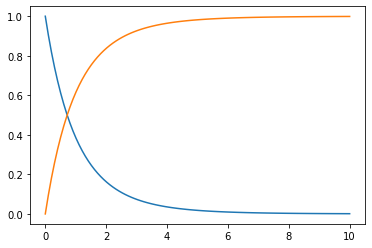

In [74]:
x = np.linspace(0, 10, 100)
y1 = df.sf(x)
y2 = df.cdf(x)
plt.plot(x, y1, label='sf')
plt.plot(x, y2, label='cdf')

In [79]:
d1 = data[data[:,1] == 1][:, 0]
d2 = data[data[:,1] == 2][:, 0]
d3 = data[data[:,1] == 3][:, 0]
d1,d2,d3

(array([243., 251., 275., 291., 347., 354., 380., 392.]),
 array([206., 210., 226., 249., 255., 273., 285., 295., 309.]),
 array([241., 258., 270., 293., 328.]))

In [77]:
st.f_oneway(d1, d2, d3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

## 多因素方差分析

In [82]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Get the data
inFile = './ISP/Code_Quantlets/08_TestsMeanValues/anovaTwoway/altman_12_6.txt'
data = np.genfromtxt(inFile, delimiter=',')

# Bring them in DataFrame-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])

# --- >>> START stats <<< ---
# Determine the ANOVA with interaction
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
anovaResults = anova_lm(lm)
# --- >>> STOP stats <<< ---
anovaResults

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(observer),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(fetus):C(observer),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN
